# Uygulama Notları: 15
## FİZ219 - Bilgisayar Programlama I | 10/09/2020

* Bütünleme Sınavı Soru ve Çözümleri

Emre S. Tasci <emre.tasci@hacettepe.edu.tr>


**1\. Soru**

Belli bir yükseklikten (referans: 0 m) serbest düşüşle bırakılan bir cismin zaman – yükseklik verileri aşağıdaki tablodaki gibi ölçülmüştür.


|   Zaman(s)	| Yükseklik (m) |
|---	|---	|
|0| 0|
|0.5|   -1.312|
|1| -4.957|
|1.5|   -11.834|
|2| -16.382|
|2.5|   -26.723|
|3| -43.17|
|3.5|   -48.251|
|4| -64.409|
|4.5|   -80.289|
|5| -112.224|

In [1]:
clear;
t = linspace(0,5,11);
y = [0.000, -1.312, -4.957, -11.834, -16.382, -26.723,...
-43.170, -48.251, -64.409, -80.289, -112.224];
disp([t',y'])

     0.00000     0.00000
     0.50000    -1.31200
     1.00000    -4.95700
     1.50000   -11.83400
     2.00000   -16.38200
     2.50000   -26.72300
     3.00000   -43.17000
     3.50000   -48.25100
     4.00000   -64.40900
     4.50000   -80.28900
     5.00000  -112.22400


a) Eldeki veri ($y$) ile yerçekimi ivmesinin bilindik değerini ($g=9.81\,m/s^2$) kullanarak kurduğunuz modelden bulduğunuz teorik değerler ($y'$) arasındaki hatanın büyüklüğünü hesaplayın $\left(e_r = \sqrt{\sum_{i=1}^{n}{\left(y_i-y’_{i}\right)^2}}\right)$.

In [2]:
g = 9.81; # m/s^2

yp = -0.5*g*t.^2;

y_m_yp = y - yp;
y_m_yp2 = y_m_yp.^2;
y_m_yp2_s = sum(y_m_yp2);
er = sqrt(y_m_yp2_s)

er =  28.917


b) Fizikten, aralarındaki ilişkinin $y(t) = -\frac{1}{2}\,g\,t^2$ denklemi ile verildiğini bildiğimize göre, tablodaki deney verilerini kullanarak, verilere en uygun olacak şekilde deneysel yerçekimi ivmesinin büyüklüğünü hesaplayın.

**Çözüm:** Hatanın küçük çıkması için, farkların karelerinin küçük olması gerekmektedir. Aradığımız, verilere en uygun yerçekimi ivmesine $a$ diyelim. Bu durumda onu kullanarak hesaplayacağımız $y'$ değerleri:
$$y' = -\frac{1}{2}\,a\,t^2$$
formülünden hesaplanacaktır.

Her bir veriden gelecek hataya $s_i$ dersek:

$$s_i = (y_i - y'_i)^2$$

ve toplam hata da bu hataların toplamının bir fonksiyonu olacaktır:

$$e_r \sim \sum_{i=1}^{n}{s_i}$$

(bir şeyin değeri ne kadar küçük olursa, kare kökü de o kadar küçük olacağından: $a\lt b\rightarrow \sqrt{a}\lt \sqrt{b}\;(a,b\ge 0)$)

O halde yapmaya çalıştığımız şey, yukarıdaki toplamı minimize eden $a$ değerini bulmak (bu konunun detayları için bkz. ["En küçük kareler yöntemi"ni işlediğimiz dersimiz](https://emresururi.github.io/FIZ219/FIZ219_EST_UygulamaNotlari_05_En_kucuk_kareler.html)).

Minimize etmek istediğimiz fonksiyon:
$$S=\sum_{i=1}^{n}{s_i} = \sum_{i=1}^{n}{(y_i - y'_i)^2}=\sum_{i=1}^{n}{\left[y_i - \left(-\frac{1}{2}\,a\,t_i^2\right)\right]^2}$$

Bunu minimize eden optimal $a$ değerini bulmak için $a$'ya göre türevini alıp, sıfıra eşitleriz:
$$\frac{d\, s_i}{d\, a} = 2\left(y_i + \frac{1}{2}a t_i^2\right)\left(\frac{1}{2}t_i^2\right) =  y_i t_i^2 + \frac{1}{2}at_i^4$$

$$\frac{d\, S}{d\, a}=\sum_{i=1}^{n}{\frac{d\, s_i}{d\, a}}=0$$
$$\sum_{i=1}^{n}{\left(y_i t_i^2 + \frac{1}{2}at_i^4\right)} = \sum_{i=1}^{n}{y_i t_i^2} + \sum_{i=1}^{n}{\frac{1}{2}at_i^4} =\sum_{i=1}^{n}{y_i t_i^2} + \frac{1}{2}a \sum_{i=1}^{n}{t_i^4} = 0$$

Buradan da $a$ değerini çekersek:

$$a = -2\frac{\sum_{i=1}^{n}{y_i t_i^2}}{\sum_{i=1}^{n}{t_i^4}}$$

olarak bulunur.

Pay ve paydanın değerlerini hesaplayalım:

In [3]:
pay = sum(y.*(t.^2));
payda = sum(t.^4);

a = -2 * pay / payda  # m/s^2

a =  8.4709


c) Hesapladığınız bu yerçekimi ivmesini kullanarak verileri ve modelin grafiğini birlikte çizdirin.

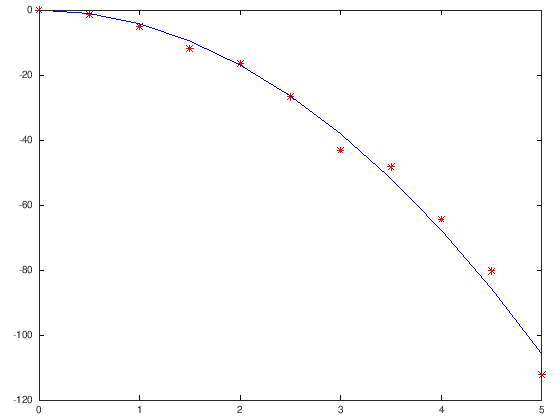

In [4]:
yp = -0.5*a*t.^2;
plot(t,y,"*r",t,yp,"-b");

d) Deney - model arasındaki hata hesabını bu sefer veri değerleri ile (b) şıkkında hesapladığınız deneysel yerçekimi ivmesini kullanarak yapın. (yani (a) şıkkında yaptığınızı bu sefer $g=9.81\,m/s^2$ değil de, sizin (b)’de bulduğunuz değeri ele alarak yapın).

In [5]:
yp = -0.5*a*t.^2;

y_m_yp = y - yp;
y_m_yp2 = y_m_yp.^2;
y_m_yp2_s = sum(y_m_yp2);
er = sqrt(y_m_yp2_s)

er =  11.245


**2. Soru**

“Fedai” ismindeki arkadaşınıza şaka yapmak maksadı ile, bilgisayarının şifresini adındaki
harflerin sırasını karıştırarak, oluşturuyorsunuz. Fakat sonrasında siz de şifreyi unuttuğunuzdan,
oturup kırmak da size kalıyor. Her harfin {‘f’,‘e’,‘d’,‘a’,‘i’} sadece 1 kere kullanıldığını ve şifrenin
5 harfli olduğunu hatırlıyorsunuz. Bu 5 harfi kullanarak üretilebilecek bütün kombinasyonları
oluşturan bir program yazın. (Bonus: Bu kombinasyonların hepsi bir dizide saklansın)

**Çözüm:** Burada for döngülerinden ve filtrelemelerden faydalanacağız. Öncelikle elimizdeki 5 harfi alıp bir torbaya (diziye) dolduralım, bu torbaya `dizi` adını verelim.

Aramızın harfler yerine sayılarla daha iyi olduğundan, ilk harf ("f") 1 indisli olan harf olsun, ikinci harf ("e") 2 indisli olan harf olsun, vs.. 

İlk kelimemizi oluşturalım: ilk harfi için bütün indisleri kullanabiliriz ama bu harf için bir indisi seçtiğimizde, o indise karşılık gelen harfi diğer indislerde kullanamayız, o nedenle onu kullanılabilen indisler listesinden çıkarmamız gerekir. 

Örneğin, kelimeye başladığımızda kullanabildiğimiz indisler: [1,2,3,4,5] (1:f, 2:e, 3:d, ...). Diyelim ki ilk harf olarak "d"yi, ya da bir diğer deyişle indisi 3 olan elemanı seçtik. O zaman ikinci harf için kullanabildiğimiz indisler [1,2,4,5] olur. Buradan da "i"yi (yani indisi 5 olan elemanı) alıp kullanalım (kelimemiz "di..." şeklinde şu anda) -- eldeki kullanılabilen indisler listesi bir elemanını (5) daha kaybedip [1,2,4] kaldı. Bu şekilde, her seferinde bulunduğumuz $n.$ harf için kullanılabilen indislerden bir tanesini alıp, sonraki harflerde o indis tekrar seçilemesin diye kullanılabilir indisler listesinden çıkartıyoruz. Bunu 4 kere yapınca, kullanılabilir indislerde doğal olarak sadece tek bir indis kalıyor ki, o da 5. harfe ait olan indis oluyor. Böylelikle 5 harfli kelimemizi türetip, oyuna bir daha baştan başlıyoruz (baştan başladığımızda da kullanılabilir indislerimizi [1,2,3,4,5] olarak tekrardan ilk haline getiriyoruz.

Bu indis seçme işini rastlantısal yaparsak, aynı kelimeyi birden fazla üretebiliriz ki bu da istediğimiz bir şey değil. onun yerine döngülerden faydalanarak sistematik olarak üreteceğiz. Bu noktada, bilgilerinizi tazelemek maksadıyla, Octave'daki for döngüsünün ille de sıralı bir listeden oluşmak zorunda olmadığını hatırlatalım -- yani çoğu zaman sıralı gitmek isteriz, mesela 2'den 6'ya birer birer saydıralım dersek:

In [6]:
for i = 2:6
    i
endfor

i =  2
i =  3
i =  4
i =  5
i =  6


Şeklinde yazarız. Ama 2:6 dediğimiz şey, tam olarak bir diziye karşılık gelmiyor mu? Yani:

In [7]:
2:6

ans =

   2   3   4   5   6



Doğal olarak bu diziye bir ad da verebiliriz:

In [8]:
kume = 2:6

kume =

   2   3   4   5   6



Ad verdiğimize göre for döngüsünde doğrudan bu adla da kullanabiliriz:

In [9]:
for i = kume
    i
endfor

i =  2
i =  3
i =  4
i =  5
i =  6


Yani aslında for'un sıralı olması gerekmiyor, yaptığı şey verilen dizinin elemanlarını sıralı olarak çekmesi:

In [10]:
for i = [5,1,6,2,-3,-1,4]
    i
endfor

i =  5
i =  1
i =  6
i =  2
i = -3
i = -1
i =  4


Bizim yaklaşımımızda bir harfin yeri için hangi indisli harfi kullanmışsak, o indisi kullanılabilen indislerden çıkarıp, bir sonraki yerin harfini bu kalanlar içinden çekip duruyoruz. (Döngülerle ilgili detaylı bilgi için bkz. [ders notlarımız](https://emresururi.github.io/FIZ219/FIZ219_EST_UygulamaNotlari_04_for_while_if.html))

In [11]:
clear;

dizi = {"f","e","d","a","i"};
depo = {}; # sonuclari toplayacagimiz dizi


kullanilabilen_indisler = 1:5;

for bir = 1:5
    # birinci indisi sectik, bunu olabilenler listesinden cikaralim
    kalan_indisler = kullanilabilen_indisler(kullanilabilen_indisler != bir);
    for iki = kalan_indisler
        kalan_indisler3 = kalan_indisler(kalan_indisler != iki);
        for uc = kalan_indisler3
            kalan_indisler4 = kalan_indisler3(kalan_indisler3 != uc);
            for dort = kalan_indisler4
                kalan_indisler5 = kalan_indisler4(kalan_indisler4 != dort);
                 bes = kalan_indisler5;
                    kelime = sprintf("%s%s%s%s%s",dizi{bir},dizi{iki}...
                             ,dizi{uc},dizi{dort},dizi{bes});
                    disp(kelime)
                    depo = {depo{:}, kelime};
            endfor
        endfor
    endfor
endfor

fedai
fedia
feadi
feaid
feida
feiad
fdeai
fdeia
fdaei
fdaie
fdiea
fdiae
faedi
faeid
fadei
fadie
faied
faide
fieda
fiead
fidea
fidae
fiaed
fiade
efdai
efdia
efadi
efaid
efida
efiad
edfai
edfia
edafi
edaif
edifa
ediaf
eafdi
eafid
eadfi
eadif
eaifd
eaidf
eifda
eifad
eidfa
eidaf
eiafd
eiadf
dfeai
dfeia
dfaei
dfaie
dfiea
dfiae
defai
defia
deafi
deaif
deifa
deiaf
dafei
dafie
daefi
daeif
daife
daief
difea
difae
diefa
dieaf
diafe
diaef
afedi
afeid
afdei
afdie
afied
afide
aefdi
aefid
aedfi
aedif
aeifd
aeidf
adfei
adfie
adefi
adeif
adife
adief
aifed
aifde
aiefd
aiedf
aidfe
aidef
ifeda
ifead
ifdea
ifdae
ifaed
ifade
iefda
iefad
iedfa
iedaf
ieafd
ieadf
idfea
idfae
idefa
ideaf
idafe
idaef
iafed
iafde
iaefd
iaedf
iadfe
iadef


Basit bir matematiksel hesapla, ilk harf için 5, ikinci harf için 4, üçüncü için 3, dördüncü için 2 ve sonuncu için 1 adet olasılık oluyor, yani toplam üretebileceğimiz kelime sayısı: 5x4x3x2x1 = 120. Bakalım biz de o kadar mı bulmuşuz?

In [12]:
columns(depo)

ans =  120


Bu çözüm, tabii ki, programlama yeteneğimizle ürettiğimiz bir çözüm. Diğer pek çok şeyde olduğu gibi, Octave'da bunu da tek seferde yapan bir komut mevcut: `perms`

In [13]:
perms(["f","e","d","a","i"])

ans =

ifeda
ifead
ifdea
ifdae
ifaed
ifade
iefda
iefad
iedfa
iedaf
ieafd
ieadf
idfea
idfae
idefa
ideaf
idafe
idaef
iafed
iafde
iaefd
iaedf
iadfe
iadef
fieda
fiead
fidea
fidae
fiaed
fiade
feida
feiad
fedia
fedai
feaid
feadi
fdiea
fdiae
fdeia
fdeai
fdaie
fdaei
faied
faide
faeid
faedi
fadie
fadei
eifda
eifad
eidfa
eidaf
eiafd
eiadf
efida
efiad
efdia
efdai
efaid
efadi
edifa
ediaf
edfia
edfai
edaif
edafi
eaifd
eaidf
eafid
eafdi
eadif
eadfi
difea
difae
diefa
dieaf
diafe
diaef
dfiea
dfiae
dfeia
dfeai
dfaie
dfaei
deifa
deiaf
defia
defai
deaif
deafi
daife
daief
dafie
dafei
daeif
daefi
aifed
aifde
aiefd
aiedf
aidfe
aidef
afied
afide
afeid
afedi
afdie
afdei
aeifd
aeidf
aefid
aefdi
aedif
aedfi
adife
adief
adfie
adfei
adeif
adefi



Doğru olmayan bir yaklaşım da, kafamıza göre -yani sistematik olmayan bir biçimde- sırayı rasgele yapıp, o şekilde kelimeleri üretmek olurdu. 3 harfli bir örnekte bunu görelim:

In [14]:
rand('state',219); # Sizin denemenizin de
                   # ayni sonuclari vermesi icin

harfler = {"a","b","c"};
# Toplamda 3x2x1 = 6 farklı permutasyon var

depo = {}

for i = 1:10
    kelime = strcat(harfler{randperm(3)}); # nasil urettigimize cok takilmayin 8)
    depo = {depo{:} kelime};
endfor
depo

depo = {}(0x0)
depo =
{
  [1,1] = cba
  [1,2] = cba
  [1,3] = bca
  [1,4] = acb
  [1,5] = abc
  [1,6] = acb
  [1,7] = cba
  [1,8] = abc
  [1,9] = cba
  [1,10] = cba
}



Her seferinde bağımsız olarak rasgele ürettiğimizden dolayı, ille de tekrara giriyoruz (zaten 6 sonucu olan bir örneği 10 kere çalıştırdığımızda "[Güvercin Deliği İlkesi](https://tr.wikipedia.org/wiki/G%C3%BCvercin_deli%C4%9Fi_ilkesi)" uyarınca bariz şekilde tekrarlanan kelimeler alacağız. Ama akıldan çıkarmayın ki, bütün olasılıkları elde etme garantimiz yok. Bu şekilde topladığımız tekrarlı bir kümeyi ayıklamak için `unique` (_benzersiz_) komutunu kullanabiliriz:

In [15]:
unique(depo)

ans =
{
  [1,1] = abc
  [1,2] = acb
  [1,3] = bca
  [1,4] = cba
}



(Görüldüğü gibi, "bac" ile "cab" çıkmamış bile -- Aman dikkat! ;)

**3. Soru**

İki boyutlu bir sistemde, $\vec{v}_1$ ve $\vec{v}_2$, sırasıyla, $m_1$  ve $m_2$ kütleli iki cismin hızları olsunlar. Bu hızlar 2 boyutlu vektörlerle tanımlansınlar (örn., $\vec{v}_1 = 3\hat{\imath}+5\hat{\jmath}$ vektörü v1 = [3,5] ile gösterilmekte). Parametreleri `(v1, v2, m1, m2)` olan, `inelastik_momentum(v1, v2, m1, m2)` fonksiyonunu yazın. Bu fonksiyon, iki cismin tümüyle inelastik çarpışması sonucunda ortaya çıkan birleşik cismin hızını (iki boyutlu bir vektör olarak) döndürsün.

**Çözüm:** Momentumun korunumundan x ve y koordinatlarına dair denklemleri ayrı ayrı yazalım. Vektörler de nasıl olsa bileşenleri ile verilmiş:

$$m_1 v_{1,x} + m_2 v_{2,x} = (m_1+m_2) v_x$$
$$m_1 v_{1,y} + m_2 v_{2,y} = (m_1+m_2) v_y$$

Buradan $v_x$ ve $v_y$'yi çekersek:

$$v_x = \frac{m_1 v_{1,x} + m_2 v_{2,x}}{(m_1+m_2)},\;
v_y = \frac{m_1 v_{1,y} + m_2 v_{2,y}}{(m_1+m_2)}$$

olarak bulunur.

Bu işlemleri fonksiyonlaştırırsak:

In [16]:
function v = inelastik_momentum(v1,v2,m1,m2)
    v1x = v1(1);
    v1y = v1(2);
    v2x = v2(1);
    v2y = v2(2);
    vx = (m1*v1x + m2*v2x)/(m1+m2);
    vy = (m1*v1y + m2*v2y)/(m1+m2);
    v = [vx,vy];
endfunction

In [17]:
V = inelastik_momentum ([1,2],[-1,-2],3,5)

V =

  -0.25000  -0.50000

